In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("data/38_feature.csv",index_col=0)
data_norm = pd.read_csv("data/38_feature_norm.csv",index_col=0)
data_std_scale = pd.read_csv("data/38_feature_std_scale.csv",index_col=0)

X = data.iloc[:,2:]
y2 = data['class2']
y4 = data['class4']
X_norm = data_norm.iloc[:,2:]
X_std_scale = data_std_scale.iloc[:,2:]


In [4]:

# define dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y2, stratify=y2 ,test_size=0.20, random_state=12)

## 1 Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
LR_clf =LogisticRegression(C=20,penalty='l2',solver='newton-cg',random_state=1,max_iter=1000).fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=10)
scores = cross_val_score(LR_clf,X_train,y_train,cv=cv,n_jobs=-1,scoring='accuracy')


print('accuracy 10-fold CV test',scores.mean())
print('accuracy on train set',accuracy_score(LR_clf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(LR_clf.predict(X_test),y_test))

accuracy 10-fold CV test 0.8671096096096096
accuracy on train set 0.9016393442622951
accuracy on test set 0.8804347826086957


## SVM

In [28]:
from sklearn.svm import SVC
SVC_clf =SVC(C=1.0,kernel='poly',probability=True).fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=10)
scores = cross_val_score(SVC_clf,X_train,y_train,cv=cv,n_jobs=-1,scoring='accuracy')


print('accuracy 10-fold CV test',scores.mean())
print('accuracy on train set',accuracy_score(SVC_clf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(SVC_clf.predict(X_test),y_test))

accuracy 10-fold CV test 0.8676651651651652
accuracy on train set 0.9207650273224044
accuracy on test set 0.8695652173913043


## KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(metric = 'euclidean',n_neighbors=12, weights= 'distance').fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=10)
scores = cross_val_score(KNN_clf,X_train,y_train,cv=cv,n_jobs=-1,scoring='accuracy')


print('accuracy 10-fold CV test',scores.mean())
print('accuracy on train set',accuracy_score(KNN_clf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(KNN_clf.predict(X_test),y_test))

accuracy 10-fold CV test 0.8535660660660659
accuracy on train set 1.0
accuracy on test set 0.8478260869565217


## DT

In [31]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=2, max_features= None, min_samples_split=2, splitter='best')
DT_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=10)
scores = cross_val_score(DT_clf,X_train,y_train,cv=cv,n_jobs=-1,scoring='accuracy')


print('accuracy 10-fold CV test',scores.mean())
print('accuracy on train set',accuracy_score(DT_clf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(DT_clf.predict(X_test),y_test))

accuracy 10-fold CV test 0.8147522522522523
accuracy on train set 0.8360655737704918
accuracy on test set 0.8478260869565217


## RF

In [26]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(max_features = 'sqrt',n_estimators=1000).fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=10)
scores = cross_val_score(RF_clf,X_train,y_train,cv=cv,n_jobs=-1,scoring='accuracy')


print('accuracy 10-fold CV test',scores.mean())
print('accuracy on train set',accuracy_score(RF_clf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(RF_clf.predict(X_test),y_test))

accuracy 10-fold CV test 0.8611711711711711
accuracy on train set 1.0
accuracy on test set 0.8478260869565217


## GB

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
GB_clf = GradientBoostingClassifier(n_estimators = 1000,learning_rate=0.1,subsample=0.7,max_depth=7).fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=10)
scores = cross_val_score(GB_clf,X_train,y_train,cv=cv,n_jobs=-1,scoring='accuracy')


print('accuracy 10-fold CV test',scores.mean())
print('accuracy on train set',accuracy_score(GB_clf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(GB_clf.predict(X_test),y_test))

accuracy 10-fold CV test 0.8642267267267267
accuracy on train set 1.0
accuracy on test set 0.8695652173913043


In [18]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(
    estimators=[\
    ('LR_clf', LR_clf),
    ('SVC_clf', SVC_clf),
    ('GB_clf',GB_clf)], 
    voting='soft', 
    weights=[1, 1, 1])

In [32]:
eclf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=10)
scores = cross_val_score(eclf,X_train,y_train,cv=cv,n_jobs=-1,scoring='accuracy')


print('accuracy 10-fold CV test',scores.mean())
print('accuracy on train set',accuracy_score(eclf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(eclf.predict(X_test),y_test))

accuracy 10-fold CV test 0.8797147147147144
accuracy on train set 0.9808743169398907
accuracy on test set 0.8804347826086957


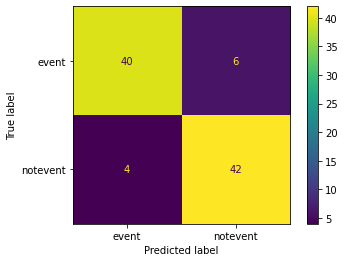

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test,eclf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=eclf.classes_)
disp.plot()
plt.show()